In [1]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Filtering

In [2]:
#PCA before filter
sc.tl.pca(adata)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


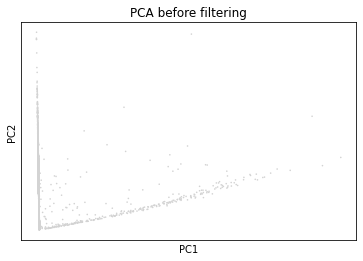

In [3]:
sc.pl.pca(adata, title='PCA before filtering')

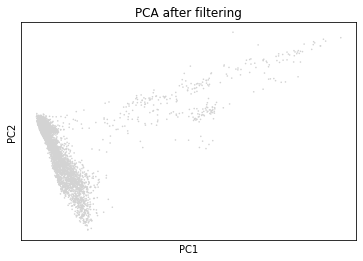

In [4]:
#PCA after filter using Zheng
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata)
sc.pl.pca(adata, title='PCA after filtering')

## Clustering

In [124]:
#Compute a neighborhood graph of observations
sc.pp.neighbors(adata)
#Use leiden method to cluster the data 
cluster = sc.tl.leiden(adata, copy = True)


In [125]:
#Embedding the data with tsne and umap
sc.tl.tsne(cluster)
sc.tl.umap(cluster)

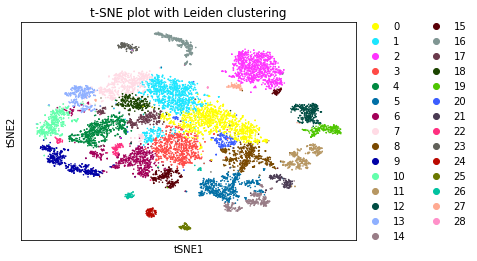

In [126]:
#Plot the t-SNE plot
sc.pl.tsne(cluster, color ='leiden', title = "t-SNE plot with Leiden clustering")


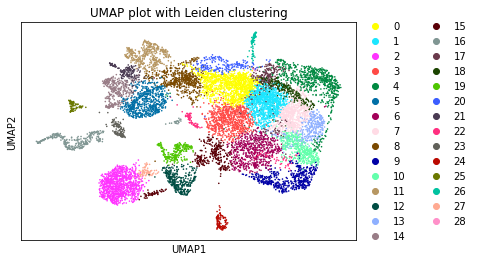

In [127]:
sc.pl.umap(cluster, color ='leiden', title = "UMAP plot with Leiden clustering")


## Distinguishing genes

In [128]:
#Identify and plot genes that distinguish each cluster
#Use t-test
sc.tl.rank_genes_groups(cluster,groupby = 'leiden', method = "t-test")



/Users/cmdb/miniconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


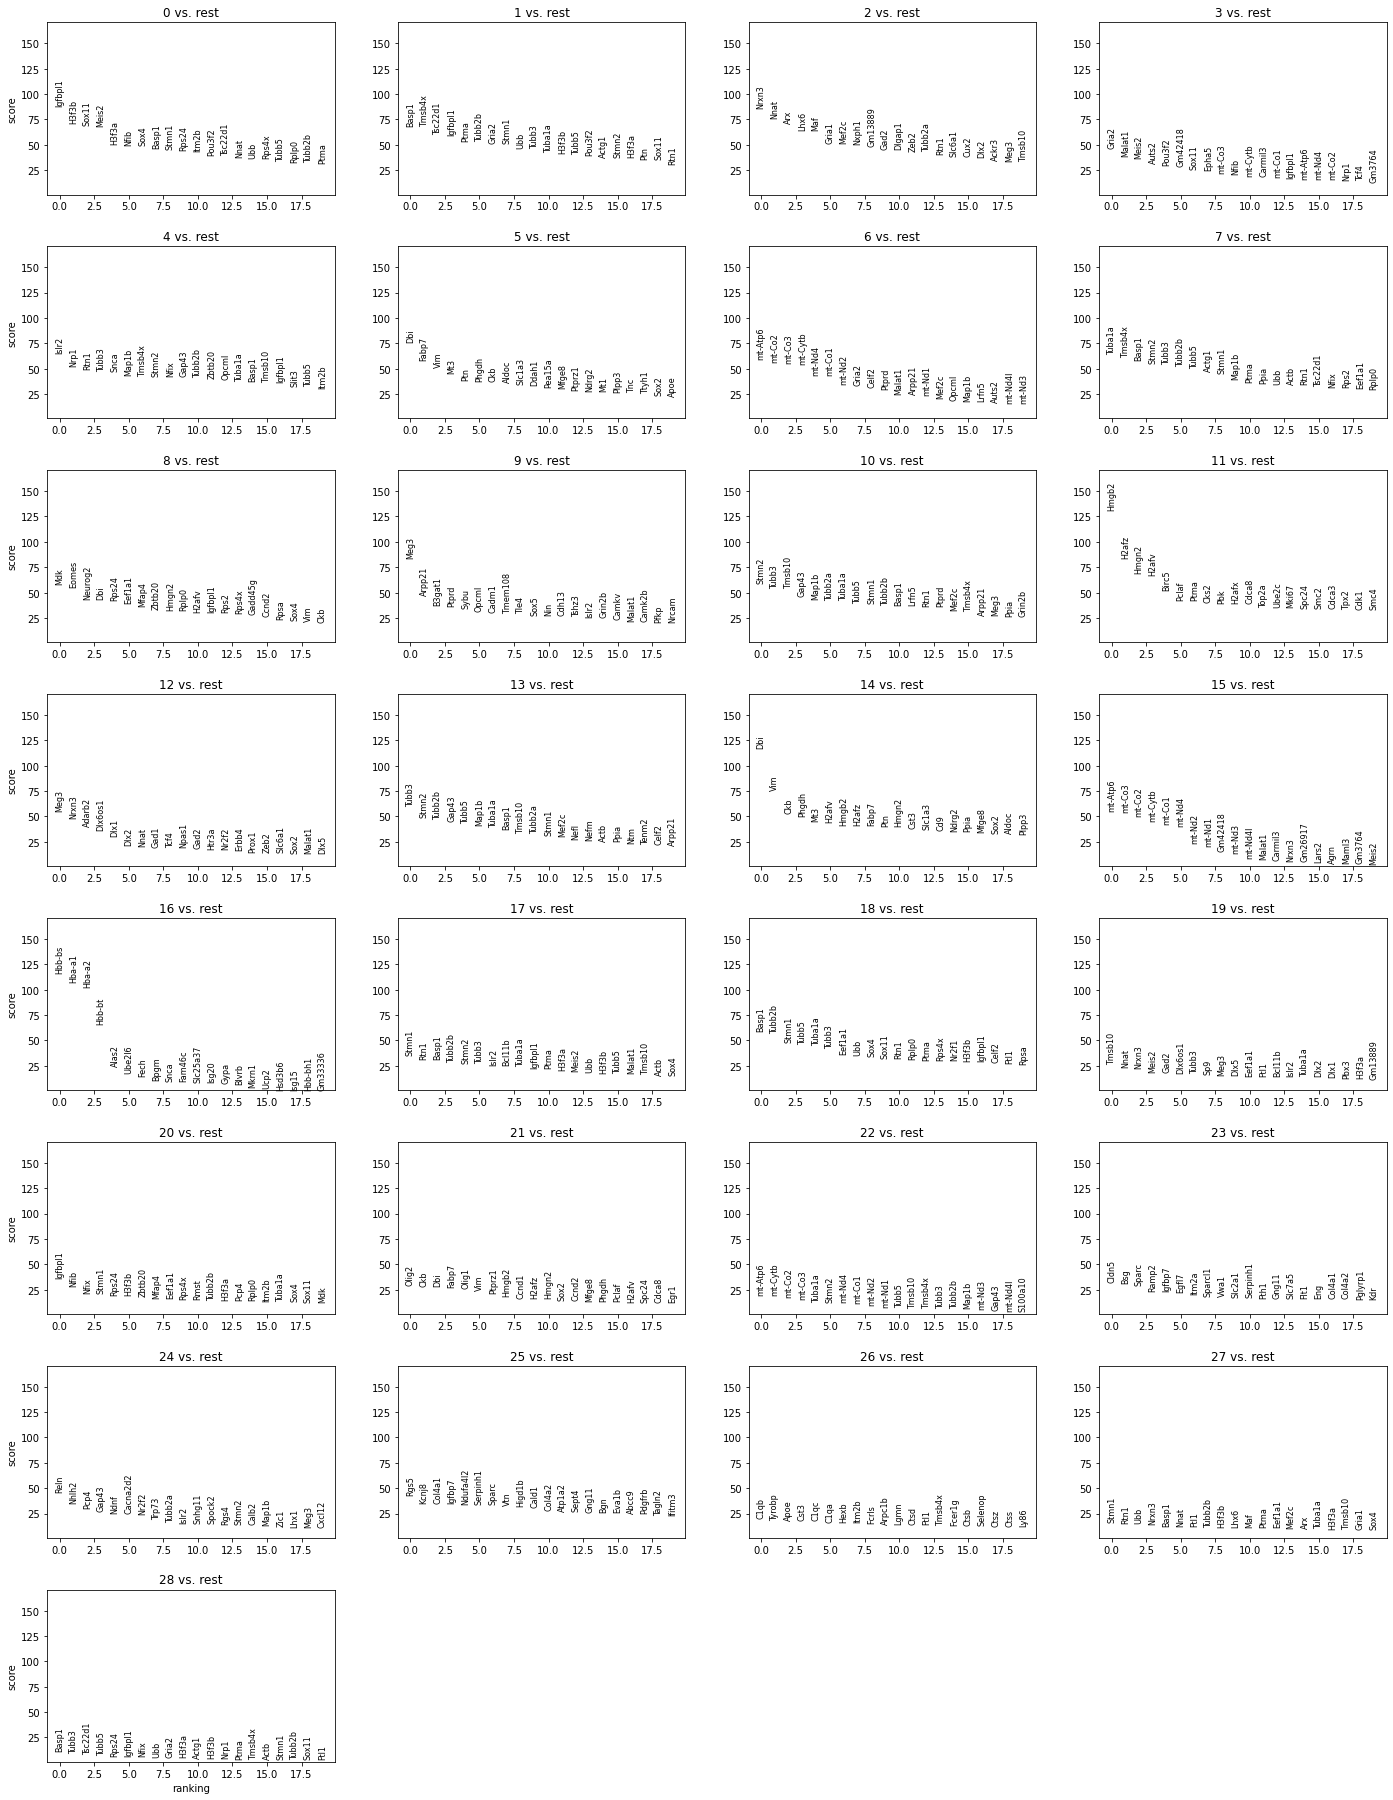

In [129]:
sc.pl.rank_genes_groups(cluster)

In [140]:
#Use logistic regression
# sc.tl.rank_genes_groups(cluster,groupby = 'leiden', method = "logreg")
#For some reason, I cannot run the rank_genes_groups using logistic regression

AttributeError: 'str' object has no attribute 'decode'

## Cell Types

In [131]:
marker = {
    "Pericytes": "Rgs5", 
    "Hematopoietic Stem Cells":"Cd34", 
    "Neutrophils":"Hbb-bs", 
    "Neural Stem Cells":"Sox2", 
    "Microgilia":"Slc1a3", 
    "Astrocytes":"Aldh1l1", 
    "Excitatory Neuron":"Gad2",  
    "Oligodendrocyte":"Olig2"
}



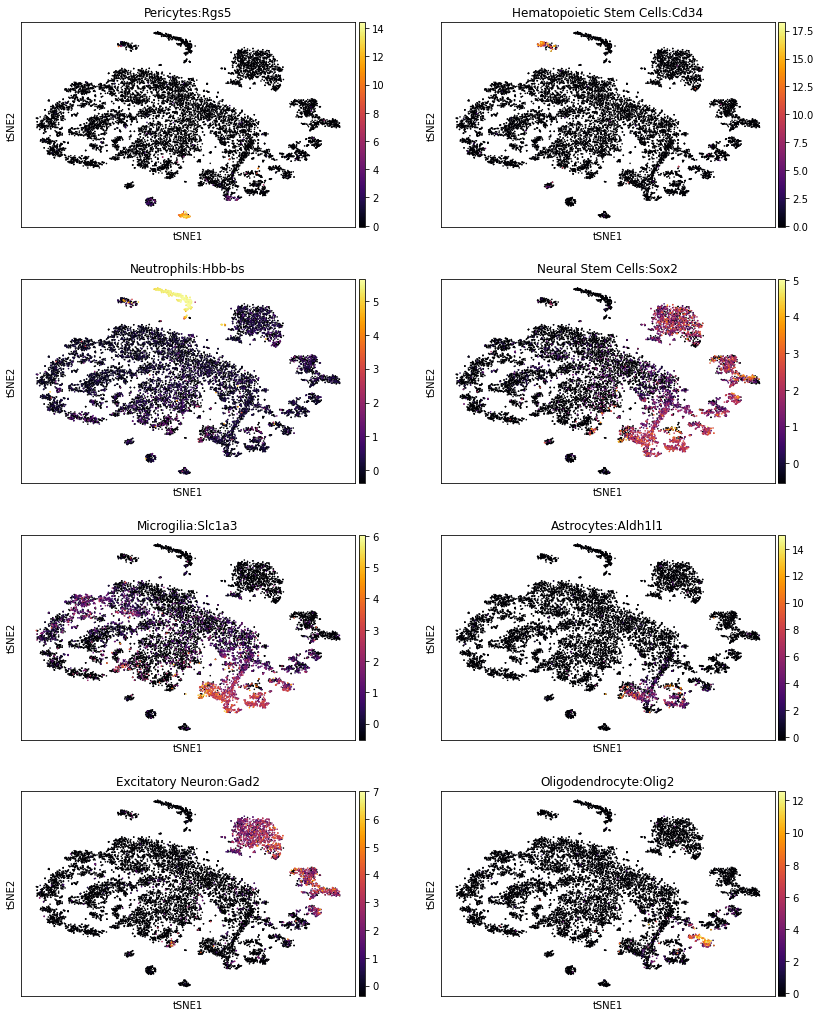

In [132]:
import matplotlib.pyplot as plt

fig = sc.pl.tsne(cluster, color=marker.values(),return_fig=True,ncols=2,color_map='inferno')

axes = fig.get_axes()
i=0
for key in marker.keys():
    axes[i].set_title(key + ":" + marker[key])
    i+=2

### Overall plot of classifications on the tSNE plot

In [133]:
cell_types = {
    "25": "Pericyte", "23": "Hematopoietic stem cell", "16":"Neutrophils", "11":"Neural Stem Cells", "5":"Microgilia", "14":"Astrocyte", "2":"Excitatory Neuron", "12":"Excitatory Neuron", "19": "Excitatory Neuron", "21":"Oligodendrocyte"

}

In [136]:
#Create a list that replaces identified cell type with names otherwise labeled as "unidentified"
classes = [cell_types[x] if x in cell_types.keys() else "Unidentified" for x in cluster.obs['leiden'].tolist() ]

In [137]:
cluster.obs["classification"] = classes


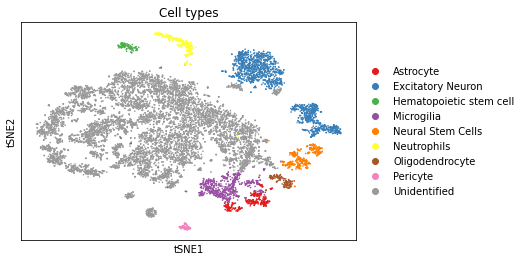

In [139]:
sc.pl.tsne(cluster,color = "classification",palette = 'Set1', title="Cell types")